<a href="https://colab.research.google.com/github/MKangabire/Water_potability/blob/Merveille/water_potability_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [22]:
#LOAD THE DATA
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2, l1
import numpy as np

df = pd.read_csv('/content/water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [23]:
df.fillna(df.mean(), inplace=True)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Plot the Data Appropriately

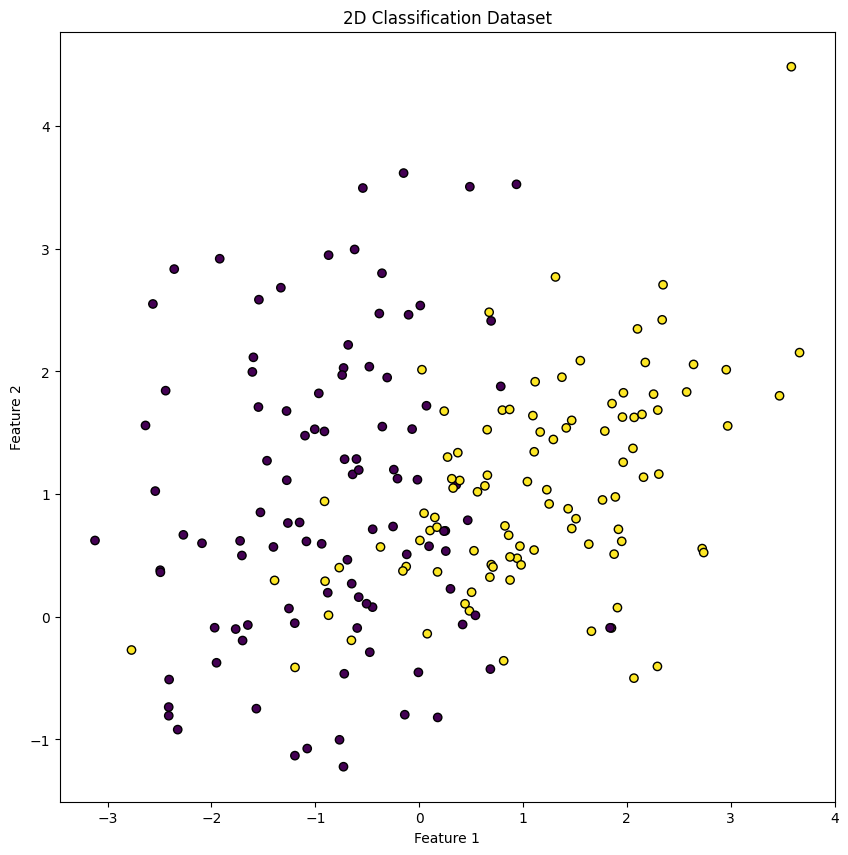

In [24]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0,
	n_clusters_per_class=1, flip_y=0, random_state=42)
plt.figure (figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Classification Dataset')
plt.show()


In [25]:
df =pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Potability'] = y
X = df.drop(columns=['Potability'])
y = df['Potability'].values

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training set: (140, 2) (140,)
Validation set: (30, 2) (30,)
Testing set: (30, 2) (30,)
Training samples: 140
Validation samples: 30
Test samples: 30


# Each Memeber Defines their model Here

In [28]:
def merveille_s_model():
    # Define the model
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.005)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.005)))
    model.add(BatchNormalization())
    # model.add(Dropout(0.4))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_val, y_val):
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, verbose=2, callbacks=[early_stopping])
    return history
model = merveille_s_model()
history = train_model(model, X_train, y_train, X_val, y_val)


Epoch 1/400
5/5 - 3s - 622ms/step - accuracy: 0.6929 - loss: 4.4270 - val_accuracy: 0.8333 - val_loss: 4.3096
Epoch 2/400
5/5 - 0s - 45ms/step - accuracy: 0.8643 - loss: 3.9900 - val_accuracy: 0.8000 - val_loss: 4.2064
Epoch 3/400
5/5 - 0s - 36ms/step - accuracy: 0.8286 - loss: 3.8880 - val_accuracy: 0.8333 - val_loss: 4.0915
Epoch 4/400
5/5 - 0s - 58ms/step - accuracy: 0.8643 - loss: 3.7366 - val_accuracy: 0.8333 - val_loss: 3.9866
Epoch 5/400
5/5 - 0s - 35ms/step - accuracy: 0.8643 - loss: 3.6373 - val_accuracy: 0.7667 - val_loss: 3.8916
Epoch 6/400
5/5 - 0s - 53ms/step - accuracy: 0.8429 - loss: 3.5332 - val_accuracy: 0.8000 - val_loss: 3.7776
Epoch 7/400
5/5 - 0s - 36ms/step - accuracy: 0.8714 - loss: 3.4208 - val_accuracy: 0.7667 - val_loss: 3.6821
Epoch 8/400
5/5 - 0s - 40ms/step - accuracy: 0.8500 - loss: 3.3304 - val_accuracy: 0.6333 - val_loss: 3.5954
Epoch 9/400
5/5 - 0s - 37ms/step - accuracy: 0.8643 - loss: 3.2417 - val_accuracy: 0.7333 - val_loss: 3.4938
Epoch 10/400
5/5 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Model Evaluation:
Accuracy: 0.9333
Precision: 0.9286
Recall: 0.9286
F1 Score: 0.9286


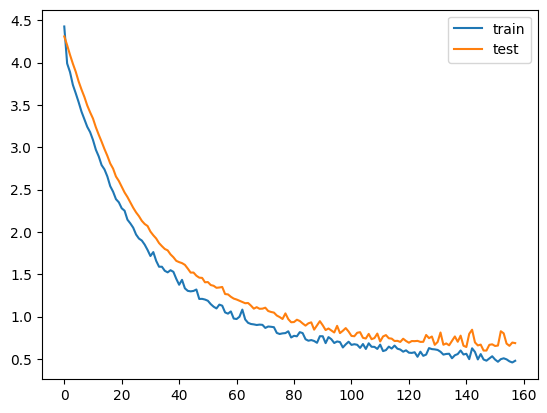

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Start the training Process

In [30]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = model.fit(X, y, validation_data=(X_val, y_val), epochs=4000, verbose=0, callbacks=[early_stopping])
# # evaluate the model
# _, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# # plot training history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()